# Machine Learning algorithms (non-sklearn)
####  Maria Leonor Zamora Maass - 2016

***
***

### DOWNLOAD AND ANALYZE DATA

In [1]:
import pandas as pd
import logging
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
%matplotlib inline

print('Loading the dataset')
df = pd.read_csv('scrap_docs/sampledata.csv', delimiter=',')

Xdata = df.values[:,:-1]
Ydata = df.values[:,-1]

print "Predictors and target names", df.columns


Loading the dataset
Predictors and target names Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x24', u'x25', u'x26', u'x27',
       u'x28', u'x29', u'x30', u'x31', u'x32', u'x33', u'x34', u'x35', u'x36',
       u'x37', u'x38', u'x39', u'x40', u'x41', u'x42', u'x43', u'x44', u'x45',
       u'x46', u'x47', u'y'],
      dtype='object')


/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.
    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test  - test set, a 2D numpy array of size (num_instances, num_features)
    Returns:
        train_normalized - training set after normalization
        test_normalized  - test set after normalization
    """
    train_normalized = (train - train.min(axis=0))/((train.max(axis=0) - train.min(axis=0))*1.0)
    test_normalized = (test - train.min(axis=0))/((train.max(axis=0) - train.min(axis=0))*1.0)
        
    return train_normalized, test_normalized


** Quick Example with small vectors**

In [3]:
    
print "EXAMPLE OF NORMALIZATION"
A = np.array([[2,6,2],[4,1,3],[5,3,8]])
B = np.array([[2,4,4],[3,1,6]])
print "A", A
print "B", B
a1, b1 = feature_normalization(A,B)
print "A normalized\n",a1
print "B normalized\n",b1


EXAMPLE OF NORMALIZATION
A [[2 6 2]
 [4 1 3]
 [5 3 8]]
B [[2 4 4]
 [3 1 6]]
A normalized
[[ 0.          1.          0.        ]
 [ 0.66666667  0.          0.16666667]
 [ 1.          0.4         1.        ]]
B normalized
[[ 0.          0.6         0.33333333]
 [ 0.33333333  0.          0.66666667]]


## SPLITTING AND NORMALIZATION !!

In [4]:

print('Split into Train and Test')
X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size =100, random_state=10)

print "values before scaling..."
print X_train[0]

print("Scaling all to [0, 1]")
X_train, X_test = feature_normalization(X_train, X_test)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1)))) # Add bias term
print X_train[0]


Split into Train and Test
values before scaling...
[ 1.          1.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.3455984   0.3455984
  1.72799201  0.26157852  0.26157852  1.30789259  0.21014752  0.21014752
  1.05073758  0.17552419  0.17552419  0.87762096  0.15065692  0.15065692
  0.7532846  -0.9854623  -0.9854623  -4.92731149 -0.9651822  -0.9651822
 -4.825911   -0.86487998 -0.86487998 -4.32439988 -0.76481837 -0.76481837
 -3.82409183 -0.67897469 -0.67897469 -3.39487344]
Scaling all to [0, 1]
[ 1.          1.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.34558282  0.34558282
  0.34558282  0.2615738   0.2615738   0.2615738   0.2214671   0.2214671
  0.2214671   0.20336605  0.20336605  0.20336605  0.1934731  

## LOSS FUNCTION AND ITS GRADIENT

In [5]:
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the square loss for predicting y with X*theta
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)
    Returns:
        loss - the square loss, scalar
    """
    loss = 0                                #initialize the square_loss
    squares_diff = ( np.dot( theta, np.transpose(X) ) - y ) **2
    loss = ( 1 / (2 * float( len(X) ) ) ) *  np.sum ( squares_diff ) 
    return loss


** Quick Example with small vectors**

In [6]:
theta = np.array( [1.00001,5,1] )    
#parameters with values for each feature
ta = 1.00001
tb = 5
tc = 1
X = np.array( [[2,6,2],[4,1,3],[5,3,8],[4,1,6]] )   #each instance with its own features
y = np.array( [2,3,5,1] )                           #prediction -> outcome for each instance
J = compute_square_loss(X, y, theta)

# Outcomes
thetaX = [((2*ta) + (6*tb) + (2*tc)),((4*ta) + (1*tb) + (3*tc)),((5*ta) + (3*tb) + (8*tc)),((4*ta) + (1*tb) + (6*tc))]
# OUTCOMES - true values
squares = (thetaX - y)**2
squares_diff = float( np.sum(squares) )

print J == float( 1/(2*4.000) )  * squares_diff

True


In [7]:

def compute_square_loss_gradient(X, y, theta):
    """
    Compute gradient of the square loss (as defined in compute_square_loss), at the point theta.
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    grad = 0                                #initialize the square_loss
    partials = np.dot ( ( np.dot( theta, np.transpose(X) ) - y ), X)
    grad = ( 1.0 / (len(X) ) ) *  partials 
    return grad


** Quick Example with small vectors**

In [8]:
    
theta = np.array( [1,5,1] )                         # Theta parameters, ONE for each feature
ta = 1
tb = 5
tc = 1
X = np.array( [[2,6,2],[4,1,3],[5,3,8],[4,1,6]] )   # Each instance xi with its own features
y = np.array( [2,3,5,1] )                           # Response -> true value for each instance
LOSS = compute_square_loss_gradient(X, y, theta)

# h(x) OUTCOMES
thetaX = [((2*ta) + (6*tb) + (2*tc)),((4*ta) + (1*tb) + (3*tc)),((5*ta) + (3*tb) + (8*tc)),((4*ta) + (1*tb) + (6*tc))]
print thetaX

# OUTCOMES - TRUE VALUES = h(x) - y
residuals =  [ 34-2, 12-3, 28-5, 15-1 ]
print residuals

# ( OUTCOMES - TRUE VALUES ) DESIGN MATRIX = [ h(x) - y] X
handGrad = np.dot (residuals, X)
print handGrad 
print LOSS == (1.0/(4)) * handGrad     #comparing this result with the function created
print LOSS



[34, 12, 28, 15]
[32, 9, 23, 14]
[271 284 359]
[ True  True  True]
[ 67.75  71.    89.75]


## CHECK THE GRADIENT WITH APPROX.

In [9]:

#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization

def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4): 
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.
    
    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of the d coordinate directions: 
    (e_1 = (1,0,0,...,0), e_2 = (0,1,0,...,0), ..., e_d = (0,...,0,1) 
    The approximation for the directional derivative of J at the point theta in the direction e_i is given by: 
    ( J(theta + epsilon * e_i) - J(theta - epsilon * e_i) ) / (2*epsilon).
    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error
    
    Return:
        A boolean value indicate whether the gradient is correct or not

    """
    
    true_gradient = compute_square_loss_gradient(X, y, theta) #the true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features)    #Initialize the gradient we approximate
    correct = 0                             # initialize the boolean
    
    for d in range(num_features):
        e_i = np.zeros(num_features)   #construct vector e
        e_i[d] = 1.0
        theta_plus = theta + (epsilon * e_i)   # this is loss (J) parmeter
        theta_minus = theta - (epsilon * e_i)
        approx_grad[d] = (compute_square_loss(X, y, theta_plus) - compute_square_loss(X, y, theta_minus)) / (2.0000*epsilon)

    diff = np.sum((true_gradient - approx_grad) **2)
    euclidean = np.sqrt(diff)
    
    if euclidean > tolerance:
        return 0   #incorrect
    else:
        return 1   #correct


** Quick Example with small vectors**

In [10]:
        
theta = np.array( [1,5,1] )                         # Theta parameters, ONE for each feature
X = np.array( [[2,6,2],[4,1,3],[5,3,8],[4,1,6]] )   # Each instance xi with its own features
y = np.array( [2,3,5,1] )                           # Response -> true value for each instance

comparison = grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4)
print comparison == True


True


## BATCH GRADIENT DESCENT

In [11]:

def batch_grad_descent(X, y, alpha=0.1, num_iter=1000, check_gradient=False):
    """
    In this question you will implement batch gradient descent to
    minimize the square loss objective
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_iter - number of iterations to run 
        check_gradient - a boolean value indicating whether checking the gradient when updating
    Returns:
        theta_hist - store the the history of parameter vector in iteration, 2D numpy array of size (num_iter+1, num_features) 
                    for instance, theta in iteration 0 should be theta_hist[0], theta in ieration (num_iter) is theta_hist[-1]
        loss_hist - the history of objective function -> vector, 1D numpy array of size (num_iter+1) 
    """
    
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_iter+1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_iter+1)                   #initialize loss_hist
    theta = np.ones(num_features)                      #initialize theta

    np.put ( theta_hist, range(0, num_features), theta )
    np.put ( loss_hist, [0] , compute_square_loss(X, y, theta) )
    for updateI in range(0,num_iter):
        if (check_gradient != False):
            comparison = grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4)    #check the gradient for the next update
            if comparison == False:
                print "wrong gradient"
                break
            else:
                 print "correct gradient"
        g = compute_square_loss_gradient(X, y, theta)
        theta = theta - (alpha * (g / np.linalg.norm(g) ))        #compute the next theta
        start = num_features * (updateI+1)
        end = start + num_features
        np.put ( theta_hist, range(start, end ), theta )                            #store historical values
        np.put ( loss_hist, [updateI+1] , compute_square_loss(X, y, theta) )
    return theta_hist, loss_hist
    

** Quick Example with small vectors**

In [12]:
    
print "GRADIENT RANDM EXAMPLE"
theta = np.array( [1,5,1] )                         # Theta parameters, ONE for each feature
X = np.array( [[2,6,2],[4,1,3],[5,3,8],[4,1,6]] )   # Each instance xi with its own features
y = np.array( [2,3,5,1] )                           # Response -> true value for each instance    
Tbacth,Jbatch = batch_grad_descent(X, y, 0.1, 3, check_gradient=False)
print "theta parameters", theta
print "loss", Jbatch


GRADIENT RANDM EXAMPLE
theta parameters [1 5 1]
loss [ 38.75        32.94889557  27.63042293  22.79447311]


##  USING THE DATASET: GRAPHS IN PYTHON FOR MULTIPLE FUNCTIONS

/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


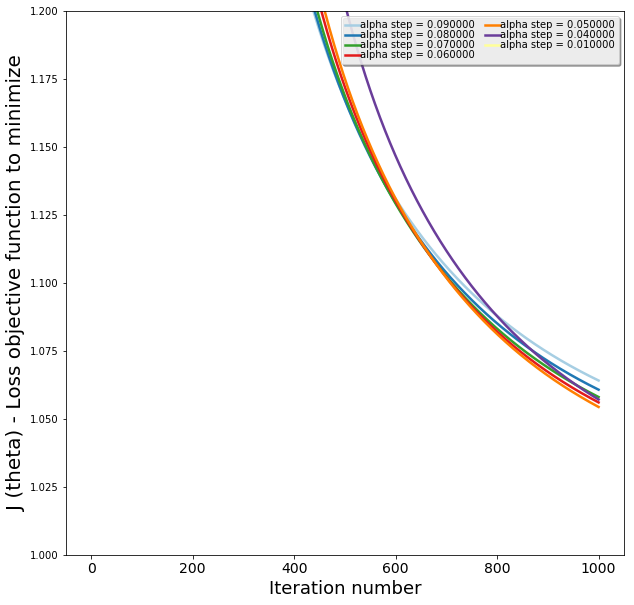

In [13]:

iter_for_graph = 1000
    
# You typically want your plot to be ~1.33x wider than tall. This plot is a rare
plt.figure(figsize=(10, 10))    
#plt.xlim(0,iter_for_graph)
plt.ylim(1,1.2)
plt.xticks(fontsize=14)     # to be able to read the x-axis

plt.ylabel("J (theta) - Loss objective function to minimize", fontsize=20) 
plt.xlabel("Iteration number", fontsize=18) 


#alpha = [0.5,0.1,0.05,0.01,0.001,0.0025,0.0001,0.0025]       ## ALPHA FOR OPTIMAL IN THE TRAIN -> FIRST PASS
alpha = [0.09,0.08,0.07,0.06,0.05,0.04,0.01]           ## ALPHA WITH ZOOM FOR OPTIMAL IN THE TRAIN


num_plots = np.size(alpha)

# Have a look at the colormaps here and decide which one you'd like:
# http://matplotlib.org/1.2.1/examples/pylab_examples/show_colormaps.html
colormap = plt.cm.Paired
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])


#plt.xscale('log')
#plt.yscale('log')
labels = []
for a,rank in enumerate(alpha):
    #Tstep, Jstep = regularized_grad_descent(X_train, y_train, rank, 10e-21,iter_for_graph)
    Tstep, Jstep = batch_grad_descent(X_train, y_train, rank, iter_for_graph, check_gradient=False)
    plt.plot(range(0,iter_for_graph+1), Jstep, lw=2.5) 
    labels.append( r'alpha step = %f' % rank )


plt.legend(labels, ncol=2, loc='upper right', columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,fancybox=True, shadow=True)
plt.show()

In [14]:
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized square loss function given X, y and theta
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient
    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    grad = 0                                #initialize the square_loss
    partials = np.dot ( ( np.dot( theta, np.transpose(X) ) - y ), X) 
    grad = ( (1.0 /( len(X) )) *  partials ) + (2 * lambda_reg * theta)
    return grad
    

## REGULARIZED GRADIENT DESCENT

In [18]:
def regularized_grad_descent(X, y, alpha=0.1, lambda_reg=1, num_iter=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        numIter - number of iterations to run 
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_iter+1, num_features) 
        loss_hist - the history of regularized loss value, 1D numpy array
    """
    (num_instances, num_features) = X.shape
    theta = np.ones(num_features) #Initialize theta
    theta_hist = np.zeros((num_iter+1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_iter+1) #Initialize loss_hist

    import time
    np.put ( theta_hist, range(0, num_features), theta )
    np.put ( loss_hist, [0] , compute_square_loss(X, y, theta) )
    for updateI in range(0,num_iter):
        
        g = compute_regularized_square_loss_gradient(X, y,theta,lambda_reg)
        theta = theta - (alpha * (g / np.linalg.norm(g) ))  #compute next theta
        start = num_features * (updateI+1)
        end = start + num_features
        np.put ( theta_hist, range(start, end ), theta )                            #store historical values
        
        regularized_loss = compute_square_loss(X, y, theta) + ( lambda_reg * np.dot(np.transpose(theta), theta) )
        np.put ( loss_hist, [updateI+1] , regularized_loss )

    return theta_hist, loss_hist

    #print "average time to update the gradient = ", np.mean(times)   # this must be in the funciton !!!
    
    
## lokking for a step in regularized
stepvec = [0.1,0.09,0.08,0.07,0.05,0.04,0.03]
for step in stepvec:
    print "RGULARIZED step = ", step
    Tcomp1,Jcomp1 = regularized_grad_descent(X_train, y_train, step, 10**-2, 1000)
    print "loss    ->", Jcomp1[-1]
    print "NOT REGULARIZED"
    Tcomp2,Jcomp2 = batch_grad_descent(X_train, y_train, step, 1000, False)
    print "loss", Jcomp2[-1]


RGULARIZED step =  0.1
loss    -> 1.79733914492
NOT REGULARIZED
loss 1.06818411997
RGULARIZED step =  0.09
loss    -> 1.7926500373
NOT REGULARIZED
loss 1.06412022215
RGULARIZED step =  0.08
loss    -> 1.78846125849
NOT REGULARIZED
loss 1.06074751003
RGULARIZED step =  0.07
loss    -> 1.78477304626
NOT REGULARIZED
loss 1.05804939751
RGULARIZED step =  0.05
loss    -> 1.77889136888
NOT REGULARIZED
loss 1.05438617692
RGULARIZED step =  0.04
loss    -> 1.77680532694
NOT REGULARIZED
loss 1.05711116626
RGULARIZED step =  0.03
loss    -> 1.77548101228
NOT REGULARIZED
loss 1.06603157682


## Graph plotting math symbols for labels in python

best lambda = 0.0131825673856
1.19804613108


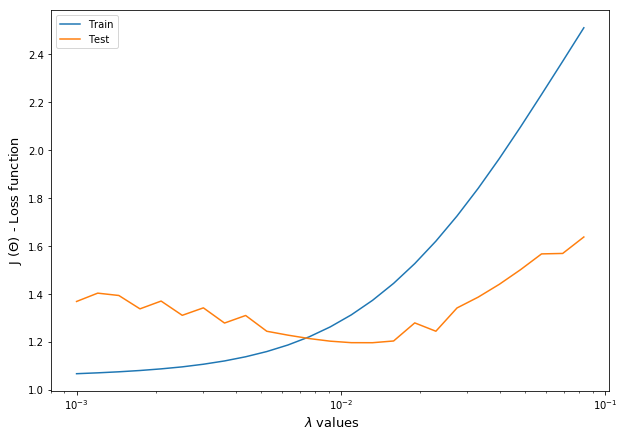

In [19]:

lamb = [10**(i) for i in np.arange(-3,-1,0.08) ]
#lamb = [10**(i) for i in np.arange(-4,1,0.2) ]

alpha = [0.05]  
iter_for_graph = 1000
  
plt.figure(figsize = (10,7))    
#plt.xlim(0,np.max(lamb))
#plt.ylim(0.8,1.5)

minimumsTrain = []
minimumsTest = []
for a,rank in enumerate(lamb):
    T, J = regularized_grad_descent(X_train, y_train, alpha, rank, iter_for_graph)    # regularized !!!
    thetaS = T[-1]
    minimumsTrain.append(compute_square_loss(X_train,y_train,thetaS))
    minimumsTest.append(compute_square_loss(X_test,y_test,thetaS))

plt.xscale('log')
#plt.yscale('log')
plt.plot(lamb, minimumsTrain, label="Train")
plt.plot(lamb, minimumsTest, label="Test")
plt.legend()
#print minimumsTrain
print "best lambda =", lamb [ np.where(  minimumsTest ==  np.min(minimumsTest ) ) [0][0] ]
print np.min(minimumsTest)
plt.ylabel("J ($\Theta$) - Loss function", fontsize=13) 
plt.xlabel(" $\lambda$ values", fontsize=13) 

plt.show()

## MINIMUM LOSS - REGULARIZED

RESULTS FOR OPTIMAL LAMBDA AND STEP SIZE, WITH  1000 ITERATIONS.


Parameters (theta*) values at the min point (computed with the train) = 
[-1.10652515  0.47420887  1.25743501  2.13636271 -1.59475246 -0.66664151
 -0.71635063 -0.71635063  0.68018648  1.25743115  2.19499078 -0.41465998
 -1.19824469 -3.48804749  1.3504415   2.17489584  1.18690049  0.35572794
 -0.06398525 -0.06398525 -0.06398525 -0.01430495 -0.01430495 -0.01430495
  0.01149302  0.01149302  0.01149302  0.02413177  0.02413177  0.02413177
  0.03136154  0.03136154  0.03136154 -0.04738325 -0.04738325 -0.04738325
  0.08051997  0.08051997  0.08051997  0.06733393  0.06733393  0.06733393
  0.06136042  0.06136042  0.06136042  0.05808359  0.05808359  0.05808359
 -1.14688438]

TEST loss with the validation set (using this theta* parameters) =  1.19804652563


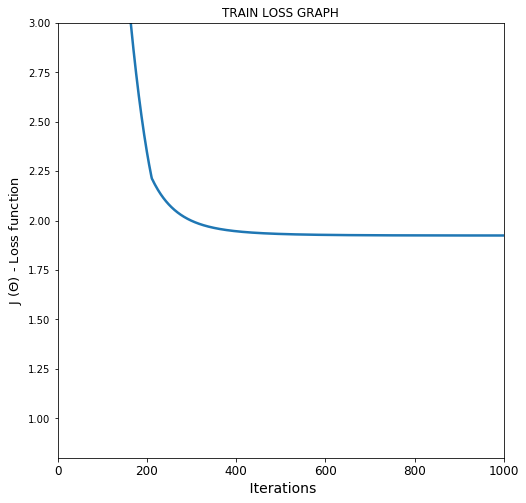

In [20]:

plt.figure(figsize=(8, 8))    
plt.xlim(0,iter_for_graph)
plt.ylim(0.8,3)
plt.xticks(fontsize=12)     # to be able to read the x-axis

alpha_BEST = [0.05]  
lamb_BEST = 0.01318256738566   # from previous exercises
iter_for_graph = 1000

TB, J_BEST = regularized_grad_descent(X_train, y_train, alpha_BEST, lamb_BEST, iter_for_graph) 
minimalJ = np.min(J)
print "RESULTS FOR OPTIMAL LAMBDA AND STEP SIZE, WITH ", iter_for_graph, "ITERATIONS.\n"

best_theta = TB [ np.where( J_BEST == J_BEST.min() )[0][0] ]    #theta history on that point
print "\nParameters (theta*) values at the min point (computed with the train) = \n", best_theta  
print "\nTEST loss with the validation set (using this theta* parameters) = ", compute_square_loss(X_test, y_test, best_theta)

plt.plot(range(0,iter_for_graph+1), J_BEST, lw=2.5) 
plt.title("TRAIN LOSS GRAPH")
plt.ylabel("J ($\Theta$) - Loss function", fontsize=13) 
plt.xlabel(" Iterations", fontsize=14)    #plot math symbols 
plt.show()


## STOCHASTIC GRADIENT DESCENT

In [21]:
def stochastic_grad_descent(X, y, alpha=0.1, lambda_reg=1, num_iter=1000):
    """
    In this question you will implement stochastic gradient descent with a regularization term
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float. step size in gradient descent
                NOTE: In SGD, it's not always a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every iteration is alpha.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t)
                if alpha == "1/t", alpha = 1/t
        lambda_reg - the regularization coefficient
        num_iter - number of epochs (i.e number of times) to go through the whole training set
    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_iter, num_instances, num_features) 
        loss hist - the history of regularized loss function vector, 2D numpy array of size(num_iter, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features)                                   #Initialize theta
    theta_hist = np.zeros((num_iter, num_instances, num_features))  #Initialize theta_hist
    loss_hist = np.zeros((num_iter, num_instances))                 #Initialize loss_hist
    import math

    XDATA = X[:]
    #np.random.shuffle(XDATA)
    y = np.array(y)
    np.put ( theta_hist, range(0, num_features), theta )
    np.put ( loss_hist, [0,0] , compute_square_loss(XDATA, y, theta) )
    for epochI in range(0,num_iter):
        for updateI in range(0,num_instances):
            if type(alpha) == str:
                if alpha == "1/sqrt(t)":  
                    alpha = float( 1/ math.sqrt(updateI+1) )
                elif alpha == "1/t":
                    alpha = float( 1/ (updateI+1) )
                elif alpha == "optional":
                    alpha = float ( 2 / (1 + (2*lambda_reg*updateI+1) ))     # constant 2 as an example
            
            g = compute_regularized_square_loss_gradient( XDATA[updateI], y[updateI], theta,lambda_reg)
            theta = theta - (alpha * (g / np.linalg.norm(g) ))               #compute next theta
            start = (epochI * num_instances *num_features) + ( num_features * (updateI) )   
            end = start + num_features
            np.put ( theta_hist, range(start, end), theta )    #store historical values from "start" to "end" (m lines, num_iter  times)
            
            regularized_loss = compute_square_loss( XDATA[updateI], y[updateI], theta) + (lambda_reg * np.dot(np.transpose(theta), theta))
            start = (epochI * num_instances) + (updateI)   
            np.put ( loss_hist, [start] , regularized_loss)
    return theta_hist, loss_hist

## looking for a step in regularized
stepVal = 0.05
lambdaOp = 10**-2
ITER = [1,1000]
for i in ITER:
    print "BATCH"
    T1,J1 = batch_grad_descent(X_train, y_train, stepVal, i, False)
    print "loss", J1[-1]
    print "RGULARIZED"
    T2,J2 = regularized_grad_descent(X_train, y_train, stepVal, lambdaOp, i)
    print "loss    ->", J2[-1]
    print "STOCHASTIC"
    T3,J3 = stochastic_grad_descent(X_train, y_train, stepVal, lambdaOp, i)
    print "loss    ->", J3[-1][-1]

BATCH
loss 434.882518545
RGULARIZED
loss    -> 435.365841487
STOCHASTIC
loss    -> 0.159490784715
BATCH
loss 1.05439055708
RGULARIZED
loss    -> 1.7788911232
STOCHASTIC
loss    -> 0.0462211395424


### STOCHASTIC GRAPHS

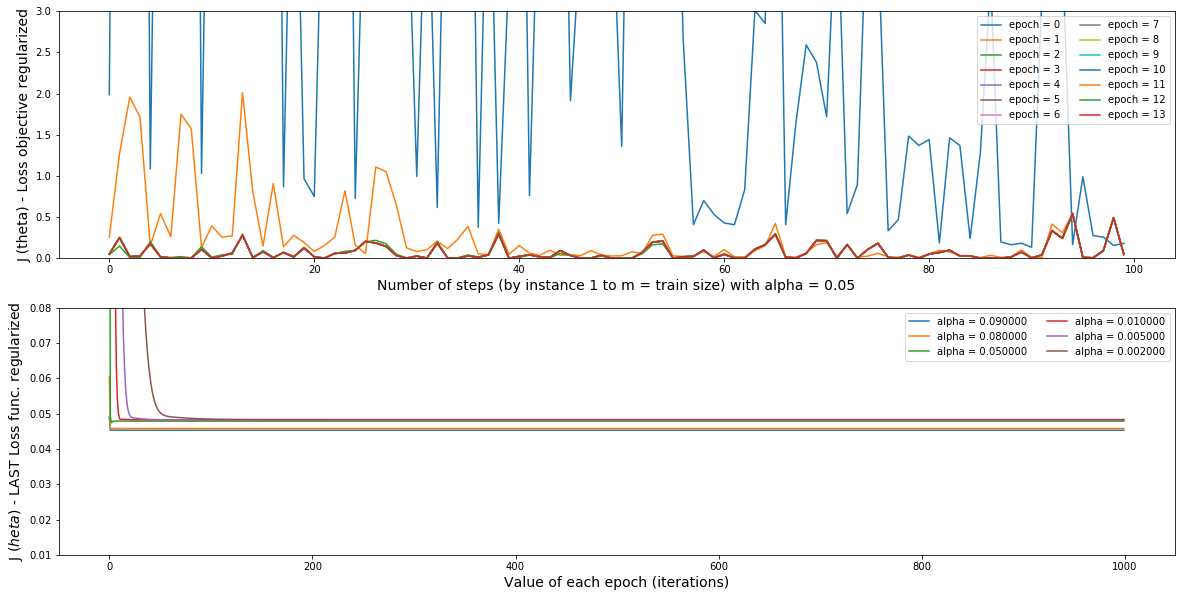

In [22]:

lamb = 0.013
    
plt.figure(figsize=(20, 10))    
plt.xlim(0,len(X_train))    # we have one vector of m elements that depends on the size of the train, SGD gives a loss per person
plt.ylim(0,3)
plt.xticks(fontsize=14)     # to be able to read the x-axis

colormap = plt.cm.Accent
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])

alpha = [0.05] 
iter_for_graph = 14
plt.subplot(211)
plt.ylim(0,3)
plt.ylabel("J (theta) - Loss objective regularized", fontsize=14) 
plt.xlabel("Number of steps (by instance 1 to m = train size) with alpha = " + str(alpha[0]), fontsize=14) 
labels = []
for a,rank in enumerate(alpha):
    T, J = stochastic_grad_descent(X_train, y_train, rank, lamb, iter_for_graph) 
    for each in range(0,iter_for_graph):
        #print J[each]
        plt.plot(range(0,len(X_train)),J[each])    #evaluating the first loss 
        labels.append( r'epoch = %d' % each )     
plt.legend(labels, ncol=2, loc='upper right')

alpha = [0.09,0.08,0.05,0.01, 0.005, 0.002]   
iter_for_graph = 1000
plt.subplot(212)
plt.ylim(0.01,0.08)
plt.ylabel("J ($\theta$) - LAST Loss func. regularized", fontsize=14) 
plt.xlabel("Value of each epoch (iterations)", fontsize=14) 
labels = []
for a,rank in enumerate(alpha):
    lossGraph = []
    T, J = stochastic_grad_descent(X_train, y_train, rank, lamb, iter_for_graph) 
    for each in range(0,iter_for_graph):
        lossGraph.append( J[each][-1] )
    #print J[each][-1]
    plt.plot( range(0,iter_for_graph), lossGraph)    #evaluating the first loss 
    labels.append( r'alpha = %f' % rank)     
plt.legend(labels, ncol=2, loc='upper right')

plt.show()

## 3d graph in python - 3d plot   look at the axis and changes !!!! zoom in lim!!

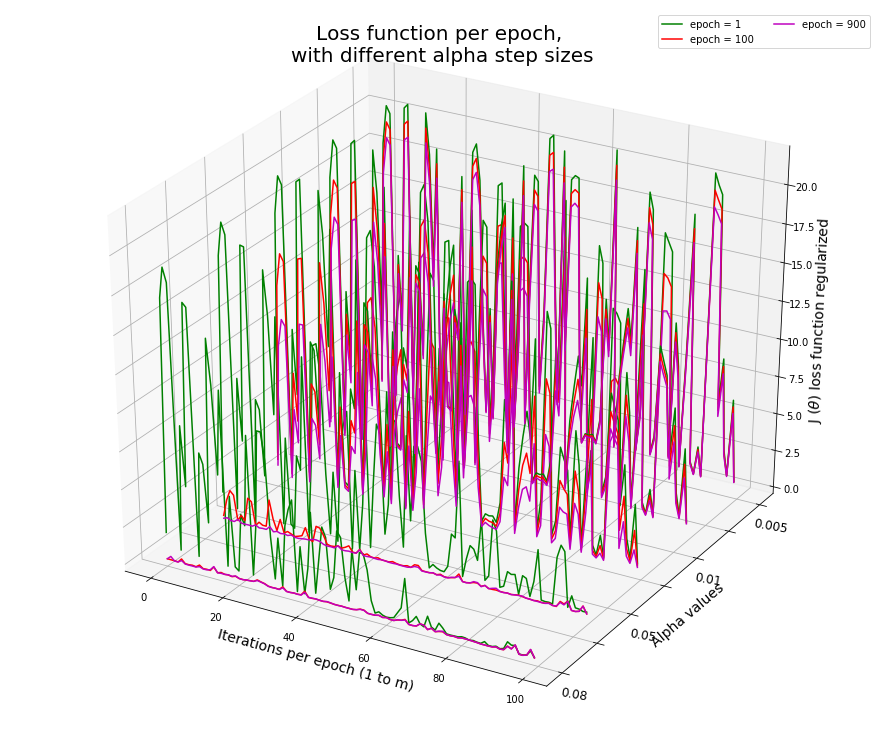

In [23]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
from matplotlib.collections import PolyCollection

fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig) 
plt.title("Loss function per epoch, \nwith different alpha step sizes", fontsize=20)
plt.ylabel("Alpha values ", fontsize=14) 
plt.xlabel("Iterations per epoch (1 to m)", fontsize=14) 
ax.set_zlabel(r'J ($\theta$) loss function regularized', fontsize=14)

alpha = [0.08,0.05,0.01, 0.005, 0.002]  
#alpha = ["1/t", "1/sqrt(t)", "optional"]    # second option
lamb = 10**-2
iter_for_graph = 3
colors = ['g', 'r','m']

labels = []
ys = np.zeros(100)
for a,rank in enumerate(alpha):
    T, J = stochastic_grad_descent(X_train, y_train, rank, lamb, iter_for_graph) 
    #plt.subplot(2,1,a)
    for each in range(0,iter_for_graph):
        ax.plot3D (range(0,100),ys,  J[each], color=str( colors[each] ) )
        #if each == 1:
        #    ax.plot3D (range(0,100), ys,J[each], color=str( colors[0] ) )
        #if each == 100:
        #    ax.plot3D (range(0,100),ys,J[each], color=str( colors[1] ) )
        #if each == 900:
        #    ax.plot3D (range(0,100),ys, J[each], color=str( colors[2] ) )
        #ax.plot3D(range(0,100), J[each], ys)
    ys = ys + 3
    
labels.append( r'epoch = %d' % (1) )
labels.append( r'epoch = %d' % (100) )
labels.append( r'epoch = %d' % (900) )
    
plt.legend(labels, ncol=2, loc='upper right')
    
#ax.set_xlim3d(0, 100)
ax.set_zlim3d(0,22)     # dont use this for the second alpha/lambda option
#ax.set_zlim3d(0,0.5) 
#ax.set_ylim3d(0, 3.5*np.size(alpha))


alpha = [0.08," ", 0.05, " ",0.01, " ", 0.005, " ", 0.002]
#alpha = ["1/t", " ", " ","1/sqrt(t)", " "," ", "optional"]
ax.set_yticklabels(alpha, rotation=-10,fontsize=12)

plt.show()

## calculate time in python

In [24]:
import time
start = time.time()
T, J = stochastic_grad_descent(X_train, y_train, 0.05, 0.001, 1)    #random step size and lambda, 1 iteration = epoch!!
end = time.time()
print "stochastic", (end - start)
start = time.time()
T, J = regularized_grad_descent(X_train, y_train, 0.05, 0.01, 1000)    #random step size and lambda, 1 iteration!!
end = time.time()
print "regularized gradient descendent", (end - start)

stochastic 0.00547194480896
regularized gradient descendent 0.0454499721527


# OTHER EXERCISES

In [25]:
a = np.zeros((2,4,3))  # 2 epochs   # 4 people  # 3 features
np.put ( a, range(0, 3), [1,1,1] )
np.put ( a, range(3, 6), [2,2,2] )
np.put ( a, range(9, 12),[4,4,4] )
print a
b = np.zeros((5,4))   # 2 epochs   # 4 people (each one its own loss)
#print b
np.put ( b, [0], [2])
np.put ( b, [1], [2])
np.put ( b, [4], [5])
np.put ( b, [14], [5])
np.put ( b, [18], [52])
b = np.array(b)
print b
np.random.shuffle(b)
print b

[[[ 1.  1.  1.]
  [ 2.  2.  2.]
  [ 0.  0.  0.]
  [ 4.  4.  4.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]]
[[  2.   2.   0.   0.]
 [  5.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   5.   0.]
 [  0.   0.  52.   0.]]
[[  2.   2.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   5.   0.]
 [  5.   0.   0.   0.]
 [  0.   0.  52.   0.]]
